# Library

In [4]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import gridspec
import glob
import cartopy.crs as ccrs
from matplotlib.pyplot import cm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab



# Load Data

In [5]:
data_control = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/control_20yr.nc')
data_10_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_10_n_20yr.nc')
data_05_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_05_n_20yr.nc')
data_00 = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_00_20yr.nc')

In [6]:
data_05s_00_05n_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_5s_00_5n/CESM_output_data/atm/hist/*")
data_05s_00_05n_last18=data_05s_00_05n_path[24:240] # Get years 3-20
data_05s_00_05n_data = xr.open_mfdataset(data_05s_00_05n_last18,combine="by_coords",use_cftime=True)
data_05s_00_05n = data_05s_00_05n_data.mean('time') # Average over the last 18 years


In [8]:
data_10s_05s_00_05n_10n_path=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_10S_5S_00_5N_10N/CESM_output_data/atm/hist/*")
data_10s_05s_00_05n_10n_last18=data_10s_05s_00_05n_10n_path[24:240] # Get years 3-20
data_10s_05s_00_05n_10n_data = xr.open_mfdataset(data_10s_05s_00_05n_10n_last18,combine="by_coords",use_cftime=True)
data_10s_05s_00_05n_10n = data_10s_05s_00_05n_10n_data.mean('time') # Average over the last 18 years


# SST

In [9]:
zero=data_00.TS.mean('lon')-data_control.TS.mean('lon')
five=data_05_n.TS.mean('lon')-data_control.TS.mean('lon')
ten=data_10_n.TS.mean('lon')-data_control.TS.mean('lon')
sfive=five.assign_coords(lat=list(reversed(five.lat)))
sten=ten.assign_coords(lat=list(reversed(ten.lat)))


In [10]:
sum_patches=sfive+sten+ten+five+zero

Exp_10s_5s_00_5n_10n = data_10s_05s_00_05n_10n.TS.mean('lon')-data_control.TS.mean('lon')


Text(0.5, 0, 'Latitude/deg')

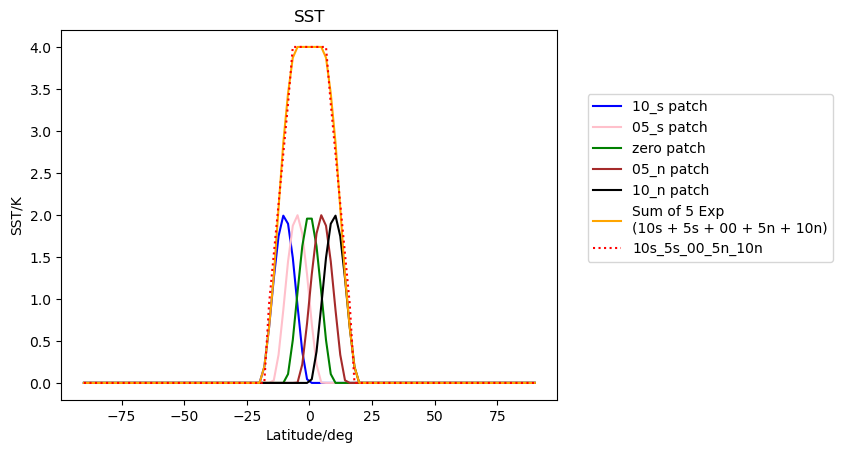

In [76]:
sten.plot(label="10_s patch", color='blue')
sfive.plot(label="05_s patch", color='pink')
zero.plot(label="zero patch", color='green')
five.plot(label="05_n patch", color='brown')
ten.plot(label="10_n patch", color='black')
sum_patches.plot(label="Sum of 5 Exp\n(10s + 5s + 00 + 5n + 10n)", color='orange')
Exp_10s_5s_00_5n_10n.plot(label="10s_5s_00_5n_10n", linestyle='dotted', color='red')
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor = (1.57, 0.6), loc='center right')
plt.title('SST')
plt.ylabel('SST/K')
plt.xlabel('Latitude/deg')

# TOA Color Plot

In [22]:
TOA_flux_exp_minus_control_00 = (data_00.FSNT.mean('lon')-data_00.FLNT.mean('lon'))-\
                                (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_05_n = (data_05_n.FSNT.mean('lon')-data_05_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_10_n = (data_10_n.FSNT.mean('lon')-data_10_n.FLNT.mean('lon'))-\
                                  (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_flux_exp_minus_control_05_s=TOA_flux_exp_minus_control_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))

TOA_flux_exp_minus_control_10_s=TOA_flux_exp_minus_control_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

In [24]:
Sum_TOA= TOA_flux_exp_minus_control_10_s+TOA_flux_exp_minus_control_05_s+TOA_flux_exp_minus_control_05_n+\
         TOA_flux_exp_minus_control_10_n+TOA_flux_exp_minus_control_00

TOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n = (data_10s_05s_00_05n_10n.FSNT.mean('lon')-data_10s_05s_00_05n_10n.FLNT.mean('lon'))-\
                                                    (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


In [25]:
pp_total=np.array(Sum_TOA)
exp_total=np.linspace(0,1,96)
plat_total=np.array(Sum_TOA.lat)
expp_total, ppp_total=np.meshgrid(exp_total, pp_total)

pp_Exp_10s_5s_00_5n_10n=np.array(TOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n)
exp_Exp_10s_5s_00_5n_10n=np.linspace(0,1,96)
plat_Exp_10s_5s_00_5n_10n=np.array(TOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n.lat)
expp_Exp_10s_5s_00_5n_10n, ppp_Exp_10s_5s_00_5n_10n=np.meshgrid(exp_Exp_10s_5s_00_5n_10n, pp_Exp_10s_5s_00_5n_10n)

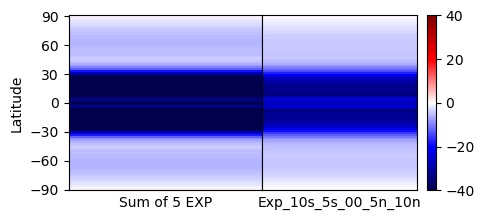

In [27]:
nrow = 1
ncol = 3
fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0)
vmax=40
vmin=-40
plt.subplot(gs[0,0])
plt.pcolormesh(expp_total,plat_total,ppp_total,cmap='seismic',vmax=vmax,vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("Sum of 5 EXP")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_Exp_10s_5s_00_5n_10n,plat_Exp_10s_5s_00_5n_10n,ppp_Exp_10s_5s_00_5n_10n,cmap='seismic',vmax=vmax,vmin=vmin)
plt.xticks([])
plt.xlabel("Exp_10s_5s_00_5n_10n")
ax = pylab.gca()
ax.yaxis.set_visible(False)

plt.colorbar(shrink=1)
plt.show()

In [77]:
#short wave of TOA flux
sTOA_flux_exp_minus_control_00 = (data_00.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_05_n = (data_05_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_10_n = (data_10_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_flux_exp_minus_control_05_s=sTOA_flux_exp_minus_control_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
sTOA_flux_exp_minus_control_10_s=sTOA_flux_exp_minus_control_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

#long wave of TOA flux
lTOA_flux_exp_minus_control_00 = (data_00.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_05_n = (data_05_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_10_n = (data_10_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_flux_exp_minus_control_05_s=lTOA_flux_exp_minus_control_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
lTOA_flux_exp_minus_control_10_s=lTOA_flux_exp_minus_control_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))



In [81]:
sSum_TOA=sTOA_flux_exp_minus_control_00+sTOA_flux_exp_minus_control_05_n+sTOA_flux_exp_minus_control_05_s+\
            sTOA_flux_exp_minus_control_10_n+sTOA_flux_exp_minus_control_10_s

sTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n = (data_10s_05s_00_05n_10n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))


lSum_TOA=lTOA_flux_exp_minus_control_00+lTOA_flux_exp_minus_control_05_n+lTOA_flux_exp_minus_control_05_s+\
        lTOA_flux_exp_minus_control_10_n+lTOA_flux_exp_minus_control_10_s

lTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n = (data_10s_05s_00_05n_10n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))



In [79]:
pp_total=np.array(sSum_TOA)
exp_total=np.linspace(0,1,96)
plat_total=np.array(sSum_TOA.lat)
expp_total, ppp_total=np.meshgrid(exp_total, pp_total)

pp_Exp_10s_5s_00_5n_10n=np.array(sTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n)
exp_Exp_10s_5s_00_5n_10n=np.linspace(0,1,96)
plat_Exp_10s_5s_00_5n_10n=np.array(sTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n.lat)
expp_Exp_10s_5s_00_5n_10n, ppp_Exp_10s_5s_00_5n_10n=np.meshgrid(exp_Exp_10s_5s_00_5n_10n, pp_Exp_10s_5s_00_5n_10n)

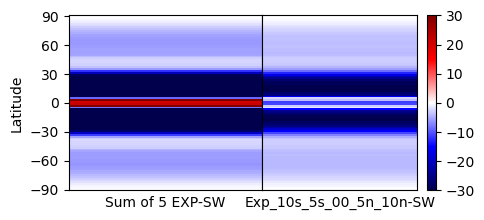

In [80]:
nrow = 1
ncol = 3
fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0)
vmax=30
vmin=-30
plt.subplot(gs[0,0])
plt.pcolormesh(expp_total,plat_total,ppp_total,cmap='seismic',vmax=vmax,vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("Sum of 5 EXP-SW")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_Exp_10s_5s_00_5n_10n,plat_Exp_10s_5s_00_5n_10n,ppp_Exp_10s_5s_00_5n_10n,cmap='seismic',vmax=vmax,vmin=vmin)
plt.xticks([])
plt.xlabel("Exp_10s_5s_00_5n_10n-SW")
ax = pylab.gca()
ax.yaxis.set_visible(False)

plt.colorbar(shrink=1)
plt.show()

In [33]:
pp_total=np.array(lSum_TOA)
exp_total=np.linspace(0,1,96)
plat_total=np.array(lSum_TOA.lat)
expp_total, ppp_total=np.meshgrid(exp_total, pp_total)

pp_Exp_10s_5s_00_5n_10n=np.array(lTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n)
exp_Exp_10s_5s_00_5n_10n=np.linspace(0,1,96)
plat_Exp_10s_5s_00_5n_10n=np.array(lTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n.lat)
expp_Exp_10s_5s_00_5n_10n, ppp_Exp_10s_5s_00_5n_10n=np.meshgrid(exp_Exp_10s_5s_00_5n_10n, pp_Exp_10s_5s_00_5n_10n)

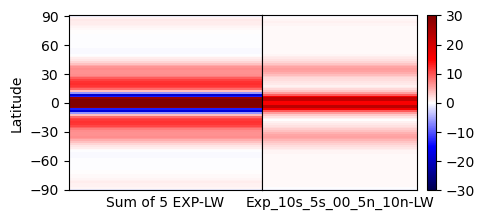

In [35]:
nrow = 1
ncol = 3
fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0)
vmax=30
vmin=-30
plt.subplot(gs[0,0])
plt.pcolormesh(expp_total,plat_total,ppp_total,cmap='seismic',vmax=vmax,vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("Sum of 5 EXP-LW")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_Exp_10s_5s_00_5n_10n,plat_Exp_10s_5s_00_5n_10n,ppp_Exp_10s_5s_00_5n_10n,cmap='seismic',vmax=vmax,vmin=vmin)
plt.xticks([])
plt.xlabel("Exp_10s_5s_00_5n_10n-LW")
ax = pylab.gca()
ax.yaxis.set_visible(False)

plt.colorbar(shrink=1)
plt.show()

# TOA Zonal Plot

In [40]:
TOA_00 = (data_00.FSNT.mean('lon')-data_00.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_05_n = (data_05_n.FSNT.mean('lon')-data_05_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_05_s=TOA_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
TOA_10_n = (data_10_n.FSNT.mean('lon')-data_10_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_10_s=TOA_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))


Qs_00=(-data_00.FLNS.mean('lon')+data_00.FSNS.mean('lon')-data_00.SHFLX.mean('lon')-data_00.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_05_n=(-data_05_n.FLNS.mean('lon')+data_05_n.FSNS.mean('lon')-data_05_n.SHFLX.mean('lon')-data_05_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_05_s=Qs_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
Qs_10_n=(-data_10_n.FLNS.mean('lon')+data_10_n.FSNS.mean('lon')-data_10_n.SHFLX.mean('lon')-data_10_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_10_s=Qs_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))



In [41]:
Sum_TOA_zonal=TOA_00+TOA_05_n+TOA_05_s+TOA_10_n+TOA_10_s
Sum_Qs_zonal=Qs_05_s+Qs_05_n+Qs_00+Qs_10_s+Qs_10_n

TOA_Exp_10s_5s_00_5n_10n=(data_10s_05s_00_05n_10n.FSNT.mean('lon')-data_10s_05s_00_05n_10n.FLNT.mean('lon'))-\
                 (data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

Qs_Exp_10s_5s_00_5n_10n=(-data_10s_05s_00_05n_10n.FLNS.mean('lon')+data_10s_05s_00_05n_10n.FSNS.mean('lon')-\
                 data_10s_05s_00_05n_10n.SHFLX.mean('lon')-data_10s_05s_00_05n_10n.LHFLX.mean('lon'))-\
                (-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-\
                 data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))


Sum_Qa_zonal=Sum_Qs_zonal-Sum_TOA_zonal
Qa_Exp_10s_5s_00_5n_10n=Qs_Exp_10s_5s_00_5n_10n-TOA_Exp_10s_5s_00_5n_10n

Text(0, 0.5, 'TOA/W/m2')

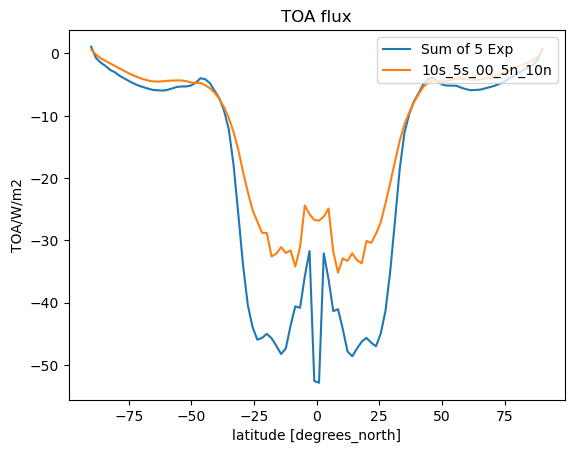

In [42]:
Sum_TOA_zonal.plot(label='Sum of 5 Exp')
TOA_Exp_10s_5s_00_5n_10n.plot(label='10s_5s_00_5n_10n')
plt.legend(loc='upper right')
plt.title('TOA flux')
plt.ylabel('TOA/W/m2')

Text(0, 0.5, 'W/m2')

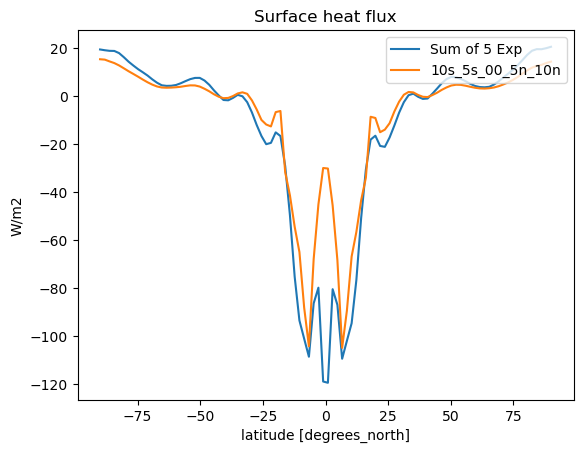

In [43]:
Sum_Qs_zonal.plot(label='Sum of 5 Exp')
Qs_Exp_10s_5s_00_5n_10n.plot(label='10s_5s_00_5n_10n')
plt.legend(loc='upper right')
plt.title('Surface heat flux')
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

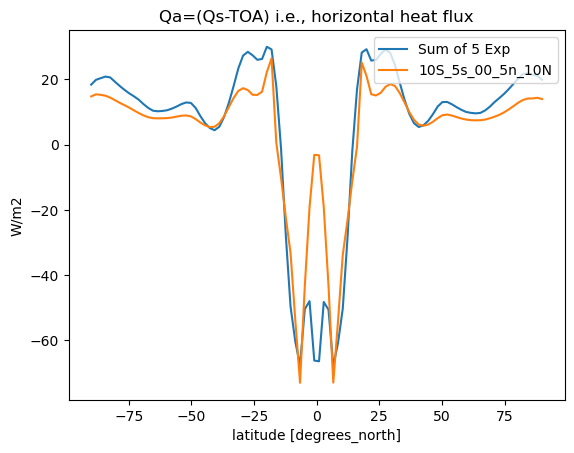

In [47]:
Sum_Qa_zonal.plot(label='Sum of 5 Exp')
Qa_Exp_10s_5s_00_5n_10n.plot(label='10S_5s_00_5n_10N')
plt.legend(loc='upper right')
plt.title('Qa=(Qs-TOA) i.e., horizontal heat flux')
plt.ylabel('W/m2')

In [48]:
#SW
sTOA_00 = (data_00.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_05_n = (data_05_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_05_s=sTOA_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
sTOA_10_n = (data_10_n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_10_s=sTOA_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

sTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n = (data_10s_05s_00_05n_10n.FSNT.mean('lon'))-(data_control.FSNT.mean('lon'))
sTOA_sum=sTOA_00+sTOA_05_n+sTOA_05_s+sTOA_10_n+sTOA_10_s

#LW
lTOA_00 = (data_00.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_05_n = (data_05_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_05_s=lTOA_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
lTOA_10_n = (data_10_n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_10_s=lTOA_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

lTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n = (data_10s_05s_00_05n_10n.FLNT.mean('lon'))-(data_control.FLNT.mean('lon'))
lTOA_sum=lTOA_00+lTOA_05_n+lTOA_05_s+lTOA_10_n+lTOA_10_s


Text(0.5, 1.0, 'SW TOA flux')

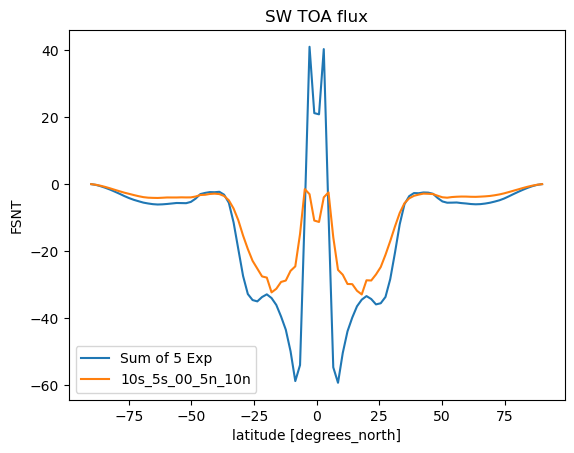

In [49]:
sTOA_sum.plot( label='Sum of 5 Exp')
sTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n.plot(label='10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title('SW TOA flux')

Text(0.5, 1.0, 'LW TOA flux')

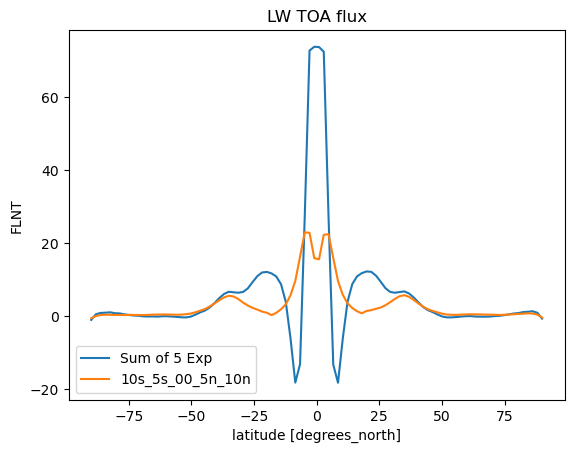

In [50]:
lTOA_sum.plot( label='Sum of 5 Exp')

lTOA_flux_exp_minus_control_Exp_10s_5s_00_5n_10n.plot(label='10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title('LW TOA flux')

# Vertical Temperature

In [51]:
T_00=data_00.T.mean('lon')-data_control.T.mean('lon')
T_05_n=data_05_n.T.mean('lon')-data_control.T.mean('lon')
T_05_s=T_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
T_10_n=data_10_n.T.mean('lon')-data_control.T.mean('lon')
T_10_s=T_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))


In [52]:
T_sum=T_00+T_05_s+T_05_n+T_10_s+T_10_n
T_Exp_10s_5s_00_5n_10n=data_10s_05s_00_05n_10n.T.mean('lon')-data_control.T.mean('lon')


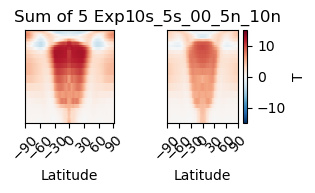

In [57]:
nrow = 1
ncol = 7
fig = plt.figure(figsize=(25, 20))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(14, 14)
gs.update(wspace=0.6)
vmax=15
vmin=-15
plt.subplot(gs[0,0])
T_sum.plot(vmax=vmax, vmin=vmin,yincrease=False, cmap='RdBu_r',add_colorbar=False)
#plt.yscale("log")
plt.title('Sum of 5 Exp')
ax = pylab.gca()
ax.yaxis.set_visible(False)
#plt.hlines(y=1000, xmin=-5, xmax=15, colors='black', linestyles='-', lw=5, label='Single Short Line')
plt.xticks([-90, -60,-30,0,30,60,90])
plt.xticks(rotation=45)
plt.xlabel('Latitude')

plt.subplot(gs[0,1])
T_Exp_10s_5s_00_5n_10n.plot(vmax=vmax, vmin=vmin,yincrease=False, cmap='RdBu_r')
#plt.yscale("log")
plt.title('10s_5s_00_5n_10n')
ax = pylab.gca()
#plt.hlines(y=1000, xmin=-10, xmax=10, colors='black', linestyles='-', lw=5, label='Single Short Line')
plt.xticks([-90, -60,-30,0,30,60,90])
plt.yticks([1000, 800, 600,400,200])
plt.xticks(rotation=45)
plt.xlabel('Latitude')

# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,6])
#plt.colorbar()
plt.show()

# All SKY, CLEAR SKY, CRE

In [63]:
#clear sky short wave
css_00=data_00.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_05_n=data_05_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_05_s=css_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
css_10_n=data_10_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_10_s=css_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

css_total=css_00+css_05_n+css_05_s++css_10_n+css_10_s
css_Exp_10s_5s_00_5n_10n=data_10s_05s_00_05n_10n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')




#clear sky long wave
csl_00=data_00.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_05_n=data_05_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_05_s=csl_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
csl_10_n=data_10_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_10_s=csl_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

csl_total=csl_00+csl_05_n+csl_05_s+csl_10_n+csl_10_s
csl_Exp_10s_5s_00_5n_10n=data_10s_05s_00_05n_10n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')




#all sky short wave
ass_00=data_00.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_05_n=data_05_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_05_s=ass_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
ass_10_n=data_10_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_10_s=ass_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

ass_total=ass_00+ass_05_n+ass_05_s+ass_10_n+ass_10_s
ass_Exp_10s_5s_00_5n_10n=data_10s_05s_00_05n_10n.FSNT.mean('lon')-data_control.FSNT.mean('lon')




#all sky long wave
asl_00=data_00.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_05_n=data_05_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_05_s=asl_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
asl_10_n=data_10_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_10_s=asl_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

asl_total=asl_00+asl_05_n+asl_05_s+asl_10_n+asl_10_s
asl_Exp_10s_5s_00_5n_10n=data_10s_05s_00_05n_10n.FLNT.mean('lon')-data_control.FLNT.mean('lon')




#CRE short wave-zonal
CRES_00 = (data_00.FSNT.mean('lon')-data_00.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_05_n = (data_05_n.FSNT.mean('lon')-data_05_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_05_s=CRES_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
CRES_10_n = (data_10_n.FSNT.mean('lon')-data_10_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_10_s=CRES_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

CRES_total=CRES_00+CRES_05_n+CRES_05_s+CRES_10_n+CRES_10_s
CRES_Exp_10s_5s_00_5n_10n=(data_10s_05s_00_05n_10n.FSNT.mean('lon')-data_10s_05s_00_05n_10n.FSNTC.mean('lon'))-\
                    (data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))



#CRE Long wave-zonal
CREL_00 = (data_00.FLNT.mean('lon')-data_00.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_05_n = (data_05_n.FLNT.mean('lon')-data_05_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_05_s=CREL_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
CREL_10_n = (data_10_n.FLNT.mean('lon')-data_10_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_10_s=CREL_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

CREL_total=CREL_00+CREL_05_n+CREL_05_s+CREL_10_n+CREL_10_s
CREL_Exp_10s_5s_00_5n_10n=(data_10s_05s_00_05n_10n.FLNT.mean('lon')-data_10s_05s_00_05n_10n.FLNTC.mean('lon'))-\
                    (data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))



Text(0, 0.5, 'W/m2')

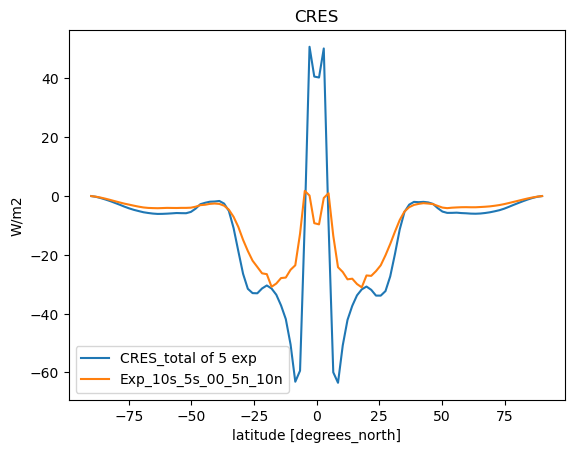

In [60]:
CRES_total.plot(label='CRES_total of 5 exp')
CRES_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("CRES")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

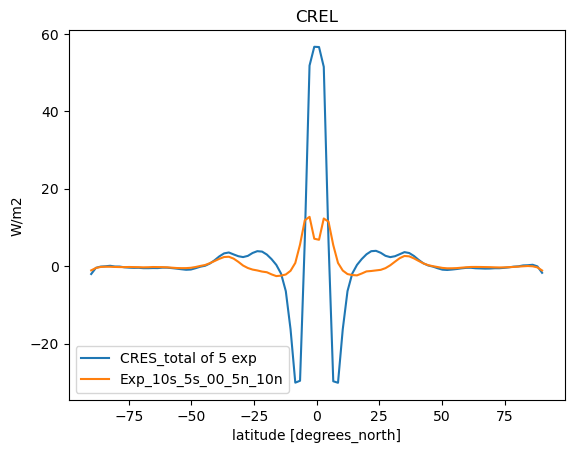

In [64]:
CREL_total.plot(label='CRES_total of 5 exp')
CREL_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("CREL")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

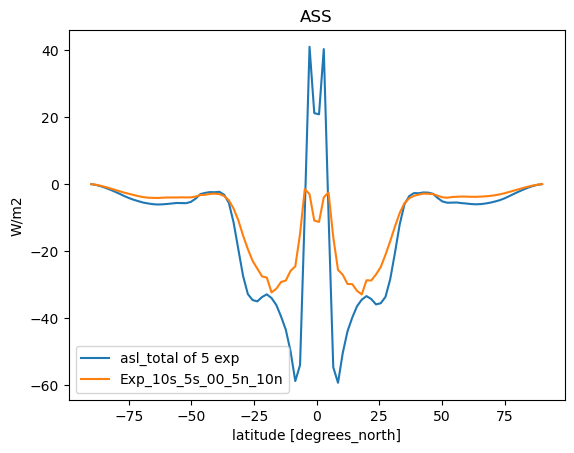

In [66]:
ass_total.plot(label='asl_total of 5 exp')
ass_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("ASS")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

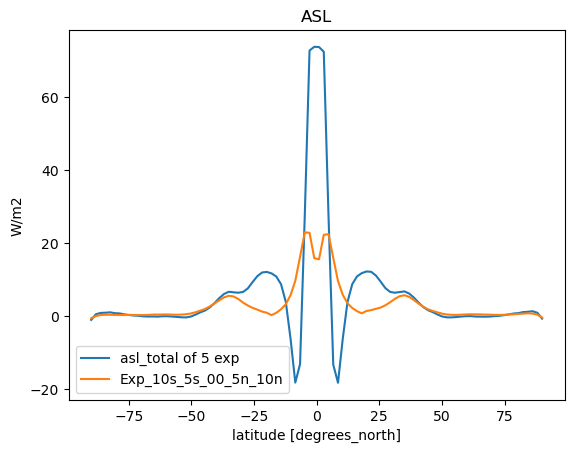

In [67]:
asl_total.plot(label='asl_total of 5 exp')
asl_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("ASL")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

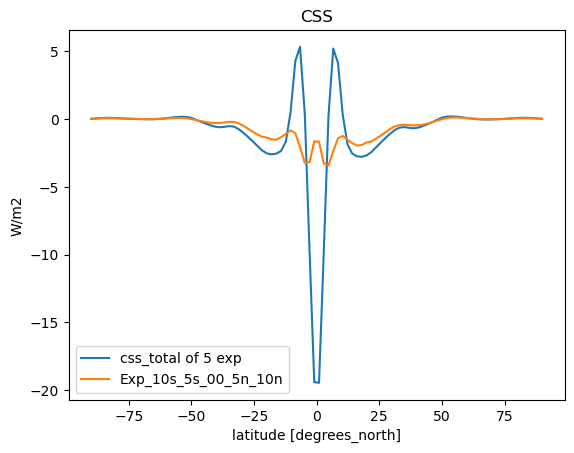

In [68]:
css_total.plot(label='css_total of 5 exp')
css_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("CSS")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

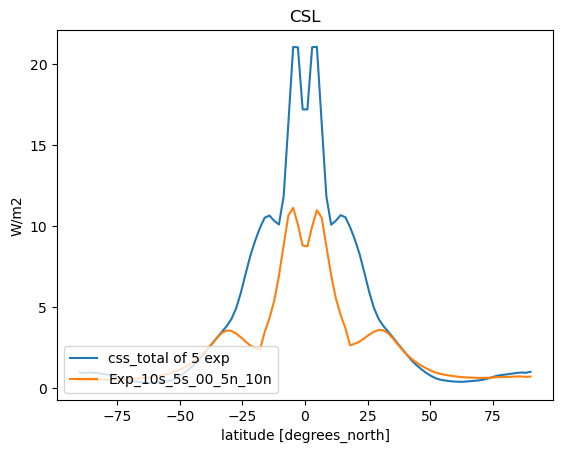

In [69]:
csl_total.plot(label='css_total of 5 exp')
csl_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("CSL")
plt.ylabel('W/m2')

In [71]:
# total clear sky
tcs_00=css_00-csl_00
tcs_05_n=css_05_n-csl_05_n
tcs_05_s=tcs_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
tcs_10_n=css_10_n-csl_10_n
tcs_10_s=tcs_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

# total all sky
tas_00=ass_00-asl_00
tas_05_n=ass_05_n-asl_05_n
tas_05_s=tas_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
tas_10_n=ass_10_n-asl_10_n
tas_10_s=tas_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))


#total CRE
tCRE_00=CRES_00-CREL_00
tCRE_05_n=CRES_05_n-CREL_05_n
tCRE_05_s=tCRE_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))
tCRE_10_n=CRES_10_n-CREL_10_n
tCRE_10_s=tCRE_10_n.assign_coords(lat=list(reversed(data_10_n.lat)))

tcs_total=tcs_00+tcs_05_n+tcs_05_s+tcs_10_n+tcs_10_s
tcs_Exp_10s_5s_00_5n_10n=css_Exp_10s_5s_00_5n_10n-csl_Exp_10s_5s_00_5n_10n

tas_total=tas_00+tas_05_n+tas_05_s+tas_10_n+tas_10_s
tas_Exp_10s_5s_00_5n_10n=ass_Exp_10s_5s_00_5n_10n-asl_Exp_10s_5s_00_5n_10n

tCRE_total=tCRE_00+tCRE_05_s+tCRE_05_n+tCRE_10_s+tCRE_10_n
tCRE_Exp_10s_5s_00_5n_10n=CRES_Exp_10s_5s_00_5n_10n-CREL_Exp_10s_5s_00_5n_10n

Text(0, 0.5, 'W/m2')

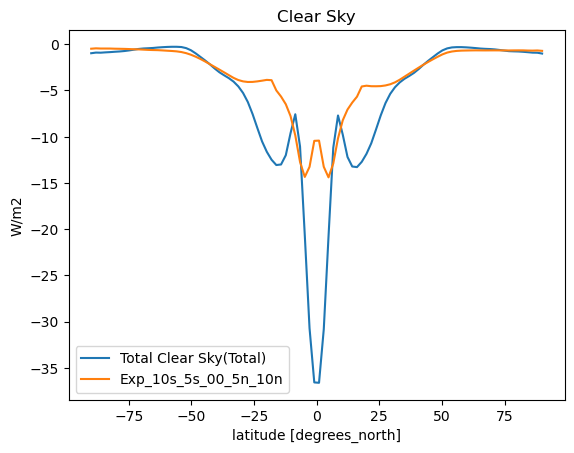

In [72]:
tcs_total.plot(label='Total Clear Sky(Total)')
tcs_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("Clear Sky")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

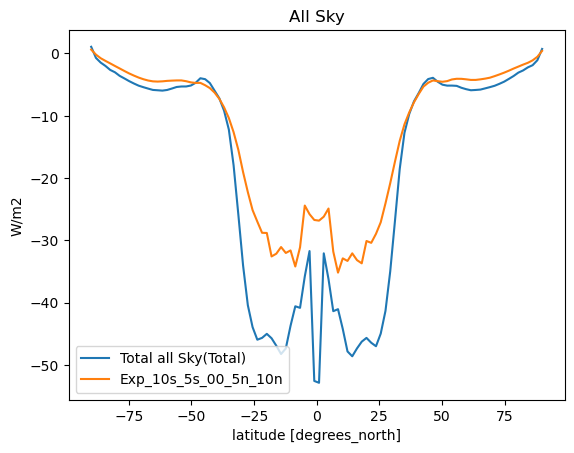

In [73]:
tas_total.plot(label='Total all Sky(Total)')
tas_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title("All Sky")
plt.ylabel('W/m2')

Text(0, 0.5, 'W/m2')

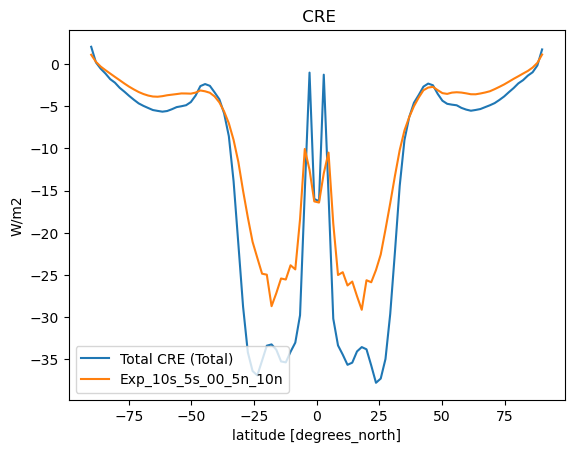

In [82]:
tCRE_total.plot(label='Total CRE (Total)')
tCRE_Exp_10s_5s_00_5n_10n.plot(label='Exp_10s_5s_00_5n_10n')
plt.legend(loc='lower left')
plt.title(" CRE")
plt.ylabel('W/m2')